In [5]:
from iir_filter import *
from scipy.signal import zpk2tf
from deltasigma import *
from sympy import symbols, Poly, simplify, init_printing  # Add these imports
import matplotlib.pyplot as plt
import numpy as np

form = 'CRFBD'
f0 = 0.0
Hinf = 4
OSR = 8
M = 4
ORD = 5
H = synthesizeNTF(ORD, OSR, 1, Hinf, f0)
a, g, b, c = realizeNTF(H, form)
ABCD = stuffABCD(a,g,b,c, form)
ABCDs, umax, S = scaleABCD(ABCD, M+1)
[ntfs, stfs] = calculateTF(ABCDs)
ntfs_nd = zpk2tf(ntfs[0], ntfs[1], ntfs[2])
init_printing()
z = symbols('z')
Numerator = Poly(ntfs_nd[0],z)
Denominator = Poly(ntfs_nd[1],z)
NTFS = Numerator/Denominator
He = simplify(1-NTFS)



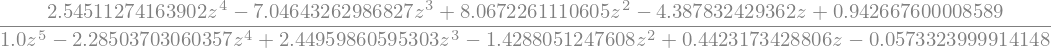

In [11]:
display(He)